### ASSIGNMENT 4 - HYPER PARAMETER TUNING & CROSS VALIDATION

### Project : Drug Classification with Decision Tree


***Goal:*** The project is to train the ***Decision Tree Machine learning model*** to classify and predict the drugs type that might be suitable for the patient based on the features/attributes.

In [1]:
# import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [3]:
# Load dataset

df = pd.read_csv("drug200.csv")
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# Data Preprocessing

X = df.drop("Drug", axis=1)
y = df["Drug"]

categorical_cols = ["Sex", "BP", "Cholesterol"]
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])
X.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043


In [5]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
# Define Hyperparameter Grid

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)


In [7]:
# Fit Model

grid.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [8]:
# Model Evaluation

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nBest Parameters:\n", grid.best_params_)
print("\nBest CV Score:\n", grid.best_score_)
print("\nTest Accuracy:\n", accuracy_score(y_test, y_pred))
print("==============================================")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Best Parameters:
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

Best CV Score:
 0.99375

Test Accuracy:
 0.975

Classification Report:
               precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



In [9]:
# Feature Importance

importances = best_model.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
})
feat_imp.sort_values(by="Importance", ascending=False)


,Feature,Importance
4,Na_to_K,0.476235
2,BP,0.266303
0,Age,0.136007
3,Cholesterol,0.121455
1,Sex,0.000000


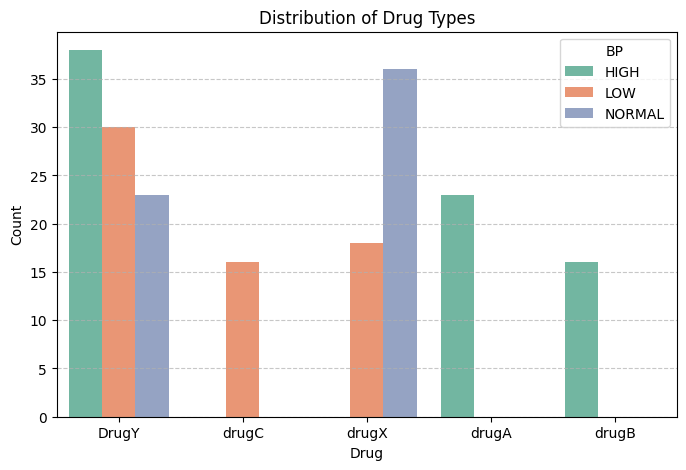

In [10]:
# Visualization - Bar Chart

plt.figure(figsize=(8,5))
sns.countplot(x="Drug", hue="BP", data=df, palette="Set2")
plt.title("Distribution of Drug Types")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


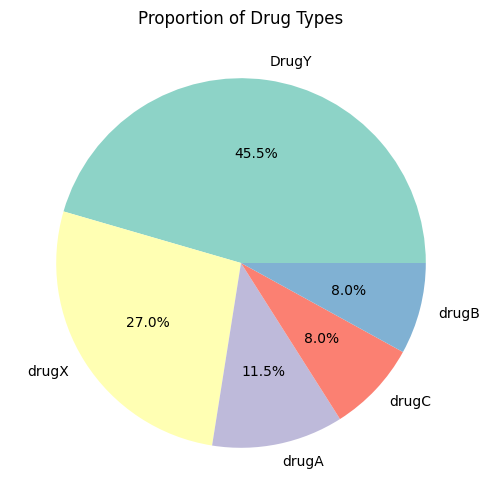

In [11]:
# Visualization - Pie Chart

plt.figure(figsize=(6,6))
df["Drug"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("Set3"))
plt.title("Proportion of Drug Types")
plt.ylabel("")
plt.show()


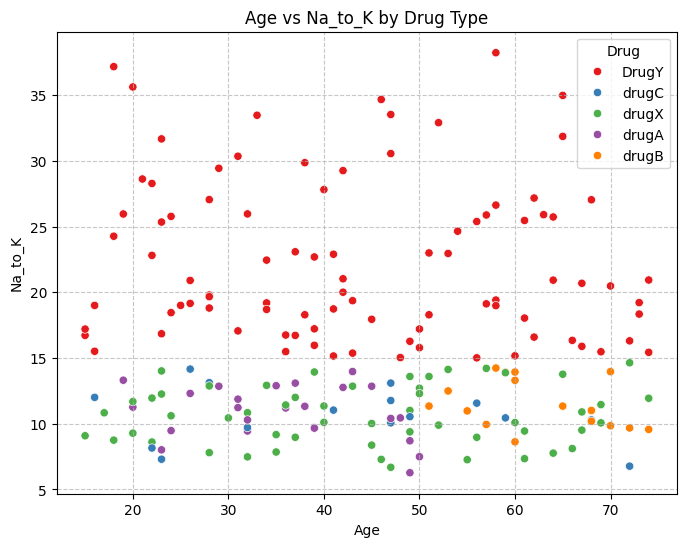

In [12]:
# Visualization - Scatterplot

plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Na_to_K", hue="Drug", data=df, palette="Set1")
plt.title("Age vs Na_to_K by Drug Type")
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


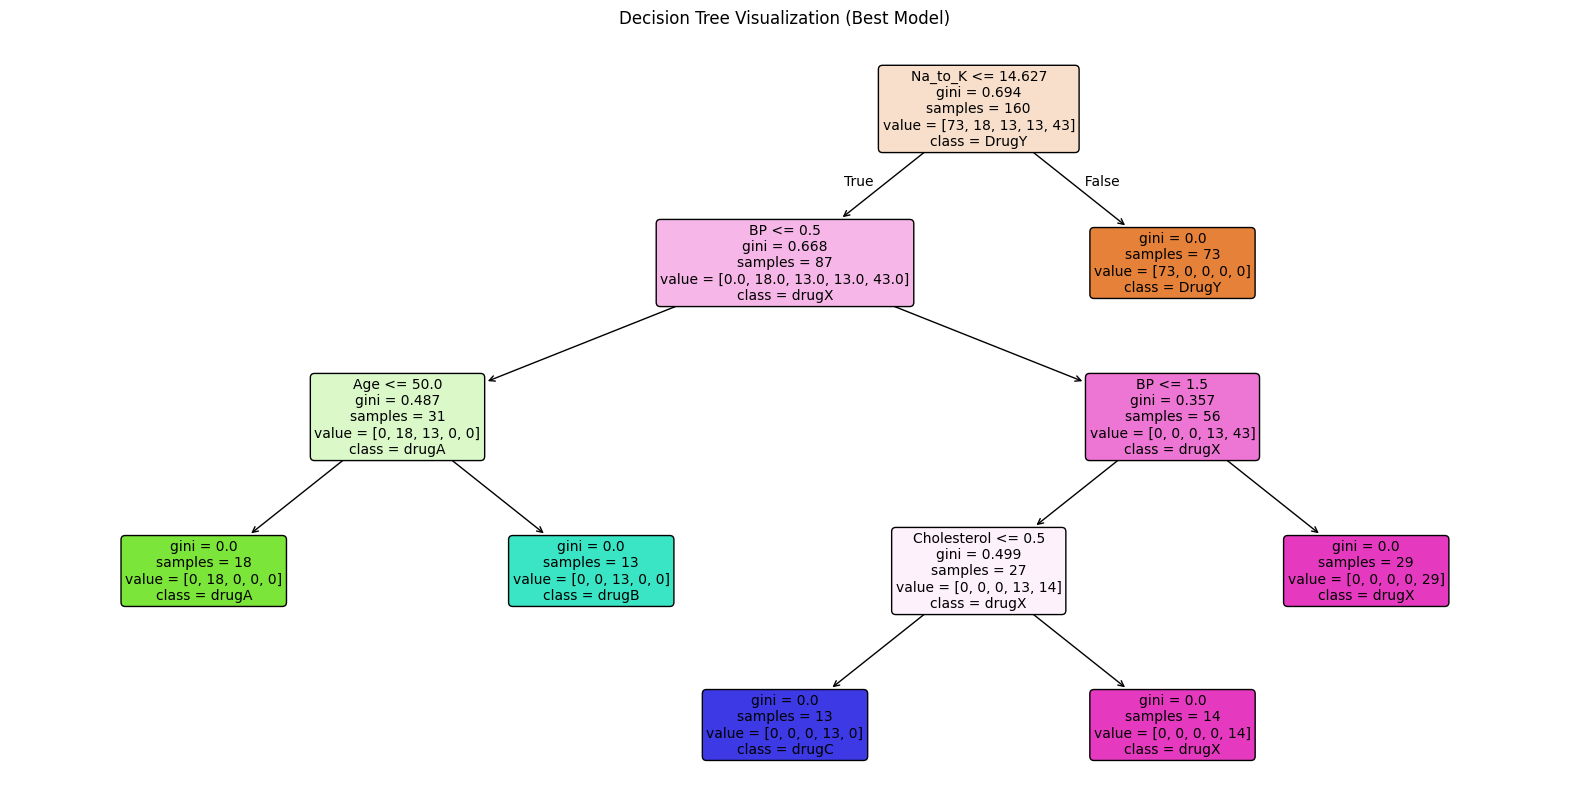

In [13]:
# Visualization - Decision Tree

plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=best_model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Best Model)")
plt.show()


### Analysis outcome

The Drug Classification with Decision Tree project showed that patient attributes like age, sex, blood pressure, cholesterol, and sodium‑to‑potassium ratio can be used to reliably predict suitable drug types. With hyperparameter tuning and cross‑validation, the model achieved solid accuracy while remaining interpretable, making it a practical baseline for healthcare decision support.



### Conclusion

Decision Tree modeling proved effective in classifying patient attributes to predict suitable drug types with accuracy and interpretability.
